# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
# this does not work for me, setting as variable instead
# from api_keys.py import weather_api_key
weather_api_key = "8e28b154ab0a7096657a3124177ac015"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [98]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [99]:
# Set the API base URL

# from api doc
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({'City': city.title(), 
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ballymena
Processing Record 2 of Set 1 | marzuq
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | sola
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | almaznyy
Processing Record 9 of Set 1 | yar-sale
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | beringovskiy
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | urumqi
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of S

Processing Record 37 of Set 4 | mugur-aksy
Processing Record 38 of Set 4 | sungurlu
Processing Record 39 of Set 4 | isla mujeres
Processing Record 40 of Set 4 | sitka
Processing Record 41 of Set 4 | bilma
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | broken hill
Processing Record 44 of Set 4 | smidovich
Processing Record 45 of Set 4 | khatanga
Processing Record 46 of Set 4 | souillac
Processing Record 47 of Set 4 | eyl
Processing Record 48 of Set 4 | karaul
City not found. Skipping...
Processing Record 49 of Set 4 | aswan
Processing Record 50 of Set 4 | coatzintla
Processing Record 1 of Set 5 | taltal
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | diu
Processing Record 4 of Set 5 | acapulco
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | stephenville
Processing Record 8 of Set 5 | durango
Processing Record 9 of Set 5 | airai
Processing Record 10 o

Processing Record 23 of Set 8 | arcachon
Processing Record 24 of Set 8 | santa catalina
Processing Record 25 of Set 8 | porto santo
Processing Record 26 of Set 8 | hihifo
City not found. Skipping...
Processing Record 27 of Set 8 | ust-nera
Processing Record 28 of Set 8 | naze
Processing Record 29 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | beaufort
Processing Record 32 of Set 8 | sinnamary
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | los algarrobos
Processing Record 36 of Set 8 | vanimo
Processing Record 37 of Set 8 | hualmay
Processing Record 38 of Set 8 | mansa
Processing Record 39 of Set 8 | tinogboc
Processing Record 40 of Set 8 | raipur
Processing Record 41 of Set 8 | kununurra
Processing Record 42 of Set 8 | kuala terengganu
Processing Record 43 of Set 8 | saldanha
Processing Record 44 of Set 8 | wahpeton
Processing Record 45 of Set 8 | sed

Processing Record 8 of Set 12 | dafeng
Processing Record 9 of Set 12 | areosa
Processing Record 10 of Set 12 | bandarbeyla
Processing Record 11 of Set 12 | porto murtinho
Processing Record 12 of Set 12 | bogorodskoye
Processing Record 13 of Set 12 | havre-saint-pierre
Processing Record 14 of Set 12 | kumano
Processing Record 15 of Set 12 | tanshui
City not found. Skipping...
Processing Record 16 of Set 12 | belmonte
Processing Record 17 of Set 12 | gurskoye
City not found. Skipping...
Processing Record 18 of Set 12 | makabe
Processing Record 19 of Set 12 | vila velha
Processing Record 20 of Set 12 | jardim
Processing Record 21 of Set 12 | konevo
Processing Record 22 of Set 12 | madang
Processing Record 23 of Set 12 | khorinsk
Processing Record 24 of Set 12 | channel-port aux basques
Processing Record 25 of Set 12 | corsicana
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | tazovskiy
Processing Record 28 of Set 12 | tessalit
Processing Record 29 of Set 12 | kamenka


In [102]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [103]:
# Converting date to datetime format
city_data_df["Date"]  = pd.to_datetime(city_data_df["Date"], unit='s').dt.strftime('%Y-%m-%d')
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ballymena,54.8636,-6.2763,282.05,92,100,3.97,GB,2023-03-23
1,Marzuq,14.4000,46.4667,296.56,65,10,2.63,YE,2023-03-23
2,Nikolskoye,59.7035,30.7861,278.66,95,66,3.46,RU,2023-03-23
3,Sola,-13.8833,167.5500,300.10,74,97,3.01,VU,2023-03-23
4,Kodiak,57.7900,-152.4072,271.88,43,0,6.69,US,2023-03-23


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ballymena,54.8636,-6.2763,282.05,92,100,3.97,GB,2023-03-23
1,Marzuq,14.4000,46.4667,296.56,65,10,2.63,YE,2023-03-23
2,Nikolskoye,59.7035,30.7861,278.66,95,66,3.46,RU,2023-03-23
3,Sola,-13.8833,167.5500,300.10,74,97,3.01,VU,2023-03-23
4,Kodiak,57.7900,-152.4072,271.88,43,0,6.69,US,2023-03-23


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

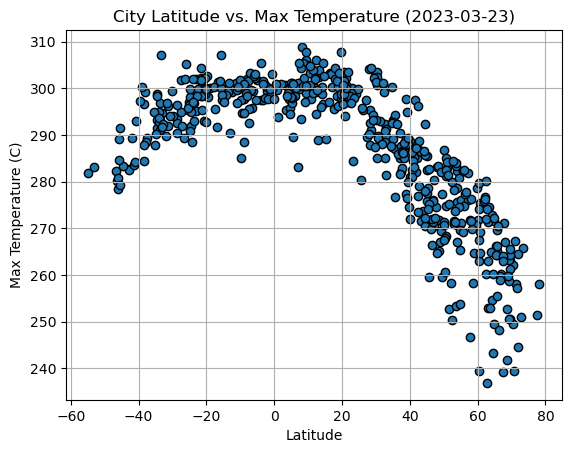

In [106]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-03-23)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

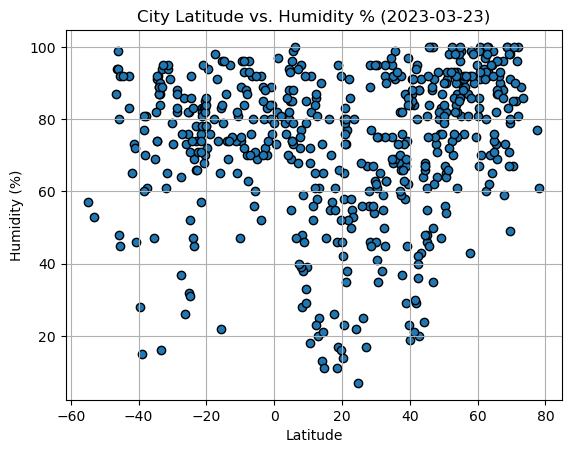

In [107]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity % (2023-03-23)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

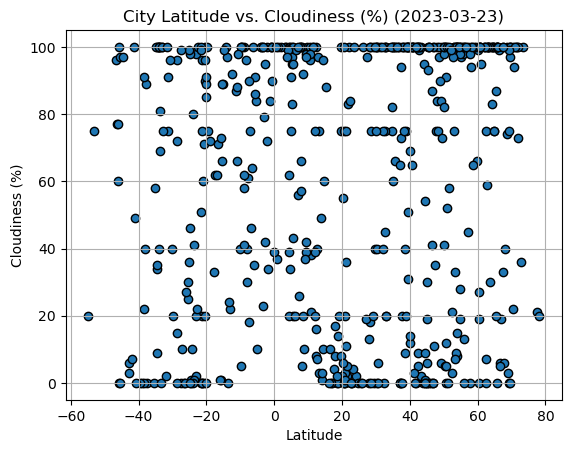

In [108]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%) (2023-03-23)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

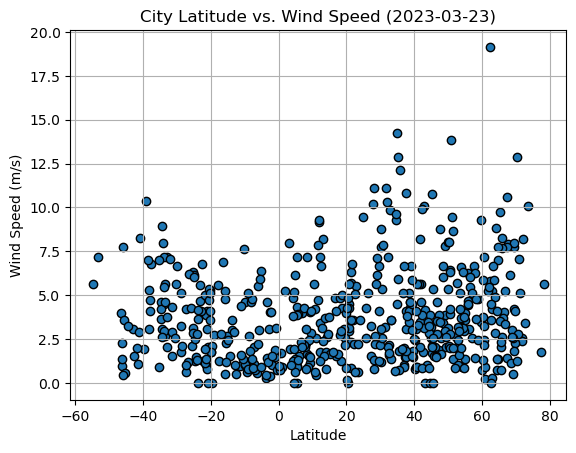

In [109]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-03-23)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [213]:
# Define a function to create Linear Regression plots

def lin_reg(x,y):
    print(f"The r-value is: {(np.corrcoef(x, y)[0,1])}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    print(line_eq)
    return line_eq

In [214]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ballymena,54.8636,-6.2763,282.05,92,100,3.97,GB,2023-03-23
1,Marzuq,14.4000,46.4667,296.56,65,10,2.63,YE,2023-03-23
2,Nikolskoye,59.7035,30.7861,278.66,95,66,3.46,RU,2023-03-23
4,Kodiak,57.7900,-152.4072,271.88,43,0,6.69,US,2023-03-23
6,Barrow,71.2906,-156.7887,258.16,85,100,5.14,US,2023-03-23


In [215]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,Sola,-13.8833,167.5500,300.10,74,97,3.01,VU,2023-03-23
5,Punta Arenas,-53.1500,-70.9167,283.21,53,75,7.20,CL,2023-03-23
10,Rikitea,-23.1203,-134.9692,298.83,66,98,5.58,PF,2023-03-23
15,Hermanus,-34.4187,19.2345,293.60,92,100,3.07,ZA,2023-03-23
20,Mataura,-46.1927,168.8643,278.52,99,60,0.95,NZ,2023-03-23


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8679041129985148
y = -0.68x +309.35


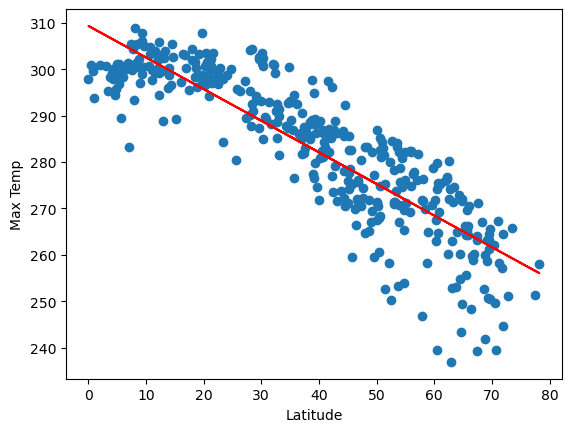

In [216]:
# Linear regression on Northern Hemisphere
# calling Linear regression function

equ_1 = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

The r-value is: 0.6596954528352562
y = 0.3x +302.63


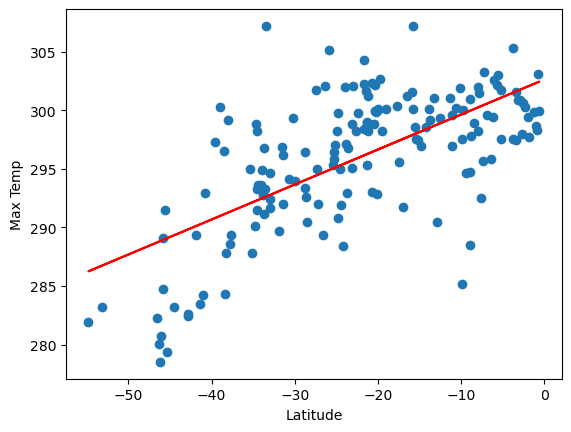

In [203]:
# Linear regression on Southern Hemisphere
equ_2 = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Show plot
plt.show()

Max Temperature and Latitude have a strong negative correlation in the Northern Hemisphere confirmed by the scatter plot regression line and an r value of -0.87. The Southern Hemisphere shows a moderate positive correlation between these two factors with an r value of 0.66.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3536620404541696
y = 0.38x +57.59


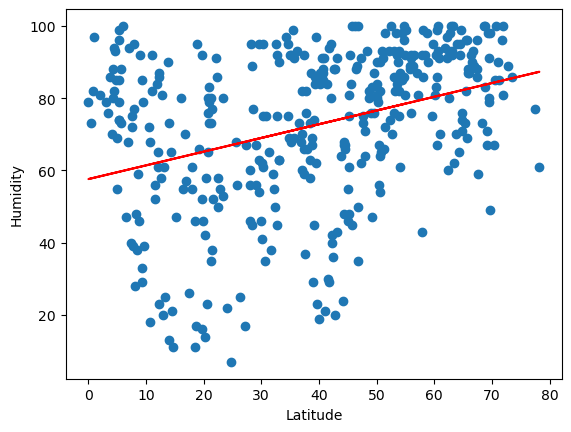

In [204]:
# Northern Hemisphere
equ_1 = lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

The r-value is: 0.1314175338691797
y = 0.17x +79.57


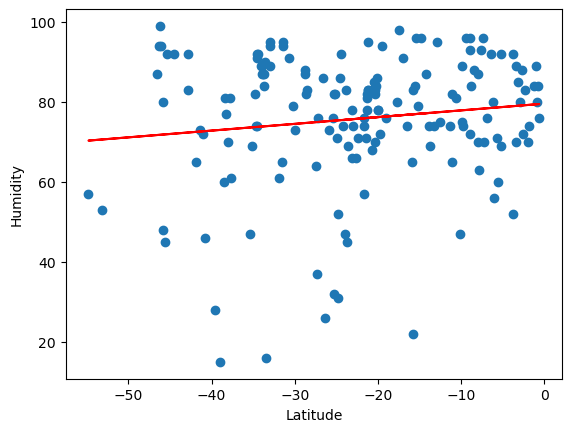

In [217]:
# Southern Hemisphere
equ_1 = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Show plot
plt.show()

The regression line between Latitude and Humidity in the Northern Hemisphere suggests a slight positive relation, the .35 r-value determines no real correlation exists. The Southern Hemisphere's r-value and trend line indicate no correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13809029990852256
y = 0.28x +49.73


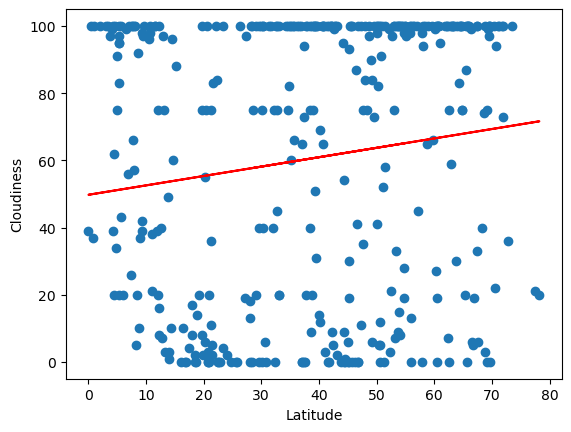

In [218]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

The r-value is: 0.20749963051981732
y = 0.61x +71.13


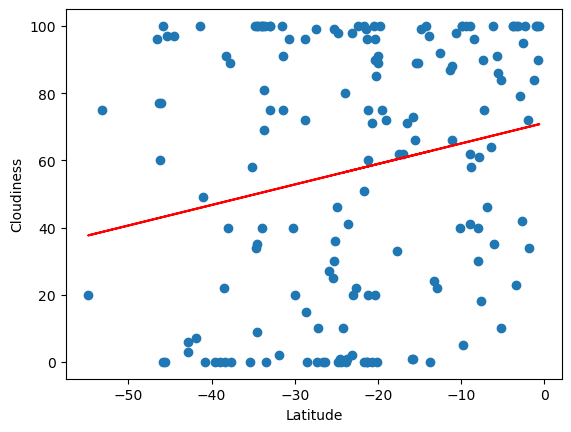

In [219]:
# Southern Hemisphere
equ_1 = lin_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Show plot
plt.show()

Both the Norhern and Southern hemispheres do not show a correlation between latitude and cloudiness, though the Southern hemispheres' r-value is roughly .07 greater than the Northern hemispheres' indicating a slightly stronger correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15572576042115535
y = 0.02x +3.1


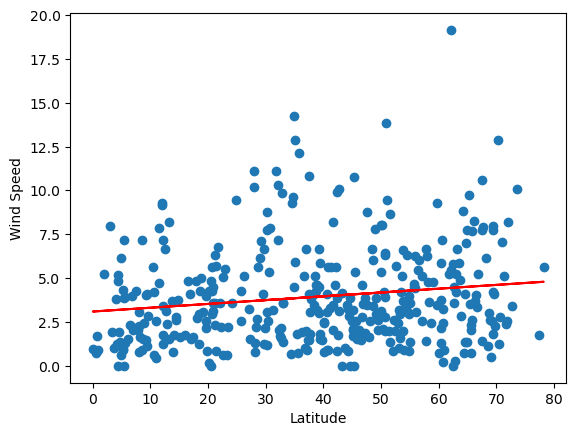

In [220]:
# Northern Hemisphere
lin_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Show plot
plt.show()

The r-value is: 0.062239040700515696


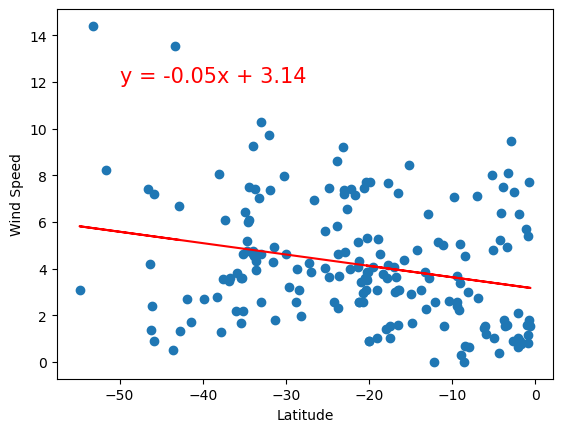

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE